In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/synthetic_online_retail_data - synthetic_online_retail_data.csv')
df["order_date"] = pd.to_datetime(df["order_date"])

In [ ]:
prices = np.array(df["price"])
average_price = np.mean(prices)
print("Average price:", average_price)

quantities = np.array(df["quantity"])
df["total_revenue"] = np.multiply(prices, quantities)
print("Total revenue:", np.sum(df["total_revenue"]))

Average price: 251.85065999999998
Total revenue: 737326.8800000001


In [ ]:
def AgeCategory(age) :
  if age <18 :
    return "Kid/Teen"
  elif 18<=age<30 :
    return "Young Adult"
  elif 30<=age<60 :
    return "Adult"
  else :
    return "Senior"
df["age_group"] = df["age"].apply(AgeCategory)

In [ ]:
high_value_orders = df[df["total_revenue"] > 300]
print(high_value_orders)

     customer_id order_date  product_id  category_id       category_name  \
0          13542 2024-12-17         784           10         Electronics   
1          23188 2024-06-01         682           50   Sports & Outdoors   
3          65208 2024-10-28         204           40  Books & Stationery   
4          63872 2024-05-10         202           20             Fashion   
5          29989 2024-12-03         829           10         Electronics   
..           ...        ...         ...          ...                 ...   
995        67967 2024-05-04         965           40  Books & Stationery   
996        99828 2024-09-12         510           40  Books & Stationery   
997        92290 2024-11-06         445           10         Electronics   
998        61427 2024-09-17         410           10         Electronics   
999        20658 2024-11-06         177           40  Books & Stationery   

    product_name  quantity   price    payment_method            city  \
0     Smartphon

In [ ]:
def PaymentMethod(payment_method) :
  if payment_method == "Bank Transfer" or payment_method == "Credit Card" :
    return "Online"
  else :
    return "Offline"
df["payment_type"] = df["payment_method"].apply(PaymentMethod)

In [ ]:
def Product_Review(review_score) :
  if review_score == 5 :
    return "Excellent"
  elif 4<=review_score<5 :
    return "Good"
  elif 3<=review_score<4 :
    return "Average"
  else :
    return "Poor"
df["product_review"] = df["review_score"].apply(Product_Review)

In [ ]:
def clean_column_names(df):
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    return df

df = clean_column_names(df)


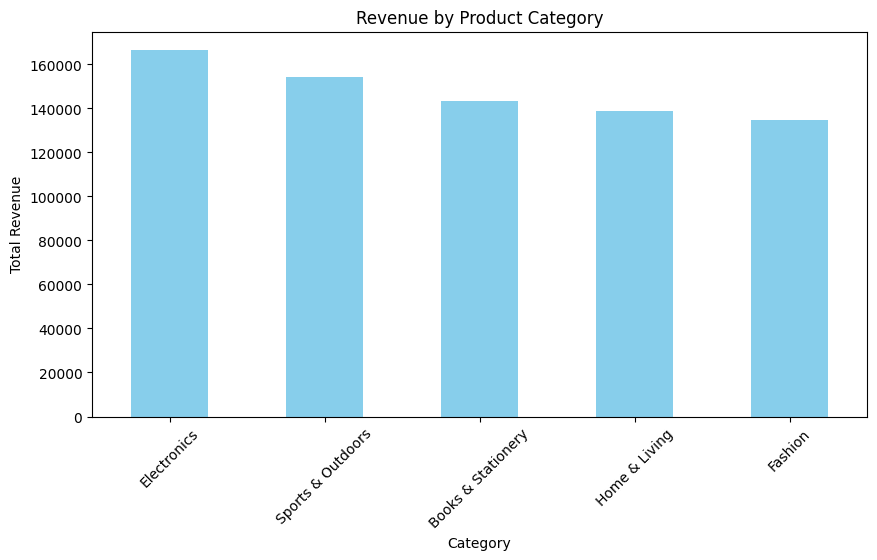

In [ ]:
# Bar chart for category-wise revenue
category_revenue = df.groupby("category_name")["total_revenue"].sum()
category_revenue = category_revenue.sort_values(ascending=False)


plt.figure(figsize=(10, 5))
category_revenue.plot(kind="bar", color="skyblue")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


Text(0, 0.5, 'Frequency')

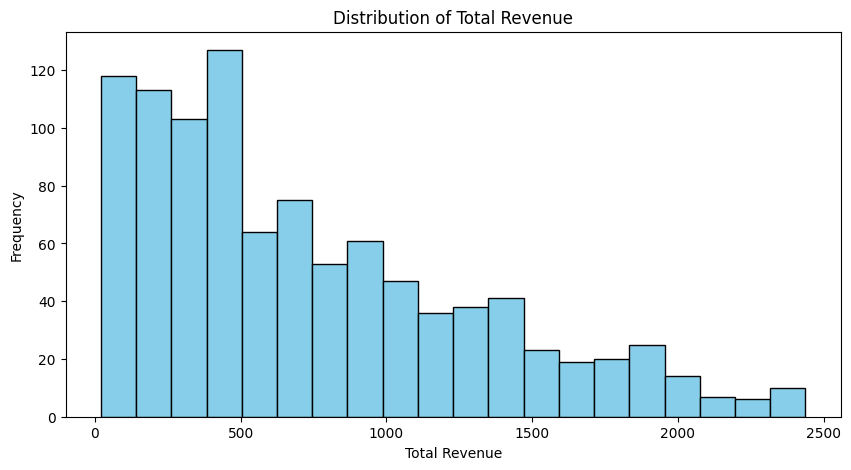

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df["total_revenue"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")

Text(0, 0.5, 'Total Revenue')

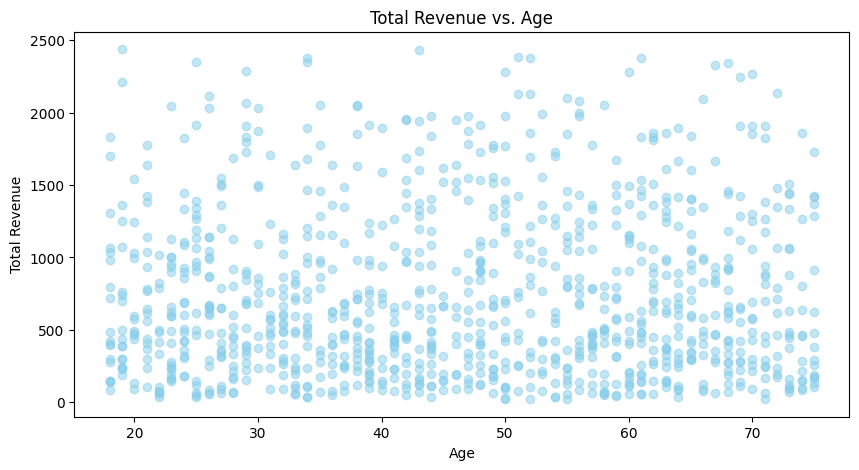

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df["age"], df["total_revenue"], alpha=0.5, color="skyblue")
plt.title("Total Revenue vs. Age")
plt.xlabel("Age")
plt.ylabel("Total Revenue")

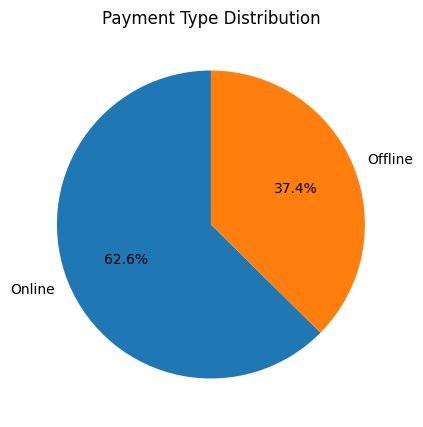

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(df["payment_type"].value_counts(), labels=df["payment_type"].value_counts().index, autopct="%1.1f%%", startangle=90)
plt.title("Payment Type Distribution")
plt.show()